# Speech Emotion Recognition with Support Vector Machine (SVM)

Welcome to this notebook! Here, we train and evaluate a Support Vector Machine (SVM) classifier for speech emotion recognition using three CSV files:

- **train_final.csv**: for training
- **val_final.csv**: for initial validation
- **test_final.csv**: for final evaluation

We’ll go through the following sections:
1. Data Loading & Exploration  
2. Data Preprocessing  
3. Baseline SVM Model  
4. Hyperparameter Tuning  
5. Final Evaluation on Test Data  
6. Conclusion and Future Steps


## 1. Data Loading & Exploration

In this section, we load our datasets into Pandas, inspect column names, preview the data, check for missing values, and look at class distributions.

In [2]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('../data/features/train_final.csv')
val_df = pd.read_csv('../data/features/val_final.csv')
test_df = pd.read_csv('../data/features/test_final.csv')

In [3]:
train_df

,Filepath,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC56,PC60,PC61,PC65,PC77,PC81,PC89,PC96,PC129,Emotion
0,./dataset/crema-d\AudioWAV\1049_ITS_HAP_XX.wav,-0.688695,-0.468096,0.269248,1.052901,-0.004237,0.143403,-0.045747,-0.148285,-0.189638,...,0.919602,-0.720861,-0.071090,-1.576363,0.874810,-0.446592,-0.386264,-1.071036,0.456687,Happy
1,./dataset/meld\train\dia259_utt0.mp4,-0.843053,-0.659363,-1.052146,0.195356,-0.457859,1.267063,1.302585,1.235284,-0.468899,...,1.365837,0.986414,0.322316,0.673972,-0.309580,-0.685108,-0.833938,1.467013,1.767669,Fear
2,./dataset/mlend\MLEndSND_Public\18603.wav,4.250202,0.150289,1.417960,1.485294,-1.927670,1.516723,2.315556,-1.032795,0.973355,...,0.719700,2.445448,-0.091854,-1.962226,2.948427,0.859881,0.137710,-1.705522,-0.059026,Happy
3,./dataset/mlend\MLEndSND_Public\09082.wav,0.685814,0.122821,-0.301217,-2.129134,1.115084,0.421946,-0.330365,0.344847,-0.790081,...,0.173613,-1.112656,1.089797,0.314386,0.245504,1.118529,0.052763,-0.072107,-2.246616,Bored
4,./dataset/mlend\MLEndSND_Public\29155.wav,0.487355,0.455662,-2.889107,-0.266165,1.506049,1.256227,0.010370,0.402961,-0.612177,...,-0.559539,1.439004,-0.547842,1.908361,0.947363,-0.614633,0.782046,-0.023401,1.148383,Question
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43563,./dataset/esd\0020\Surprise\0020_001469.wav,-0.143305,-0.850333,-0.448037,0.113519,-0.196789,-0.219130,-0.651993,-0.545429,-0.807768,...,0.751647,-0.752743,-1.490566,0.474764,-0.060749,0.060179,0.672775,-0.198681,-1.403006,Surprise
43564,./dataset/tess\OAF_angry\OAF_pain_angry.wav,0.266080,-1.886425,0.980333,-0.414012,-0.483284,-1.759905,-0.093530,0.885069,2.200331,...,-0.148423,1.055539,-1.624759,0.717019,0.603775,-1.843525,0.983363,1.014833,0.865912,Anger
43565,./dataset/esd\0017\Surprise\0017_001472.wav,-0.131262,-1.294148,-0.040265,0.151489,-0.805533,0.314832,-0.279077,0.202473,-0.900491,...,1.013627,0.590211,-0.622992,0.669361,-0.482314,-0.083206,0.649804,-0.464027,1.496281,Surprise
43566,./dataset/meld\train\dia972_utt7.mp4,-1.033521,-0.080125,0.145242,-0.050444,-1.019125,0.200068,0.464090,0.584300,0.543369,...,-0.638508,-0.905715,-1.156737,-0.512546,-0.518228,-0.197359,-0.598607,-0.680870,0.168625,Sad


In [4]:
val_df

,Filepath,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC56,PC60,PC61,PC65,PC77,PC81,PC89,PC96,PC129,Emotion
0,./dataset/meld\train\dia32_utt3.mp4,-1.150781,0.116259,0.744332,-0.018696,-1.175272,0.906571,0.914488,0.321920,-0.553343,...,-0.191928,0.968962,-0.060309,0.615011,-0.407714,-0.199985,-0.274602,-0.215205,0.152011,Neutral
1,./dataset/esd\0020\Surprise\0020_001437.wav,-0.375202,-0.846457,-0.152631,0.369764,-0.504559,0.066397,-0.570647,0.046898,-0.462260,...,-0.358857,0.153697,-0.507494,0.385008,-1.239893,-0.328189,-0.851677,0.012909,-1.384221,Surprise
2,./dataset/crema-d\AudioWAV\1048_MTI_DIS_XX.wav,-1.202539,0.493871,-1.945000,1.023211,-0.327653,0.087818,0.071361,0.057396,0.754135,...,-0.562548,0.531051,0.276034,-0.008651,-0.484194,-0.031604,2.121431,-0.287752,-0.331766,Disgust
3,./dataset/meld\train\dia926_utt7.mp4,-0.861443,-0.191731,-1.950326,-0.055892,0.219919,1.618724,1.837577,0.730615,-0.654681,...,0.187534,0.934612,-0.174831,1.788525,0.604924,-0.340423,-0.301058,-0.077897,-0.619774,Neutral
4,./dataset/esd\0019\Happy\0019_000921.wav,-0.071594,-0.973629,0.063185,0.006614,0.101935,0.216652,0.087943,0.411404,-0.752007,...,0.997576,-0.968251,-0.579919,-1.171514,0.672089,-1.135235,-0.053728,-0.454727,-0.898865,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,./dataset/esd\0020\Happy\0020_001016.wav,-0.487189,-0.344237,-0.472818,-0.427524,-0.165822,-0.430534,-0.163765,-0.021398,0.331682,...,-0.093387,-1.516680,0.655516,0.016357,1.472470,0.286340,-0.340291,0.776877,-1.319674,Happy
9333,./dataset/esd\0012\Neutral\0012_000102.wav,0.013944,-1.270305,-0.481756,-0.182030,-0.447240,-0.359324,-0.177877,-1.007185,-0.165703,...,-0.693041,-1.296831,0.057770,1.235350,-0.176629,0.655948,-0.704409,-0.415251,0.616312,Neutral
9334,./dataset/esd\0011\Sad\0011_001137.wav,-0.012553,-0.743462,-0.706324,1.169155,0.143569,-0.576614,-1.147296,-1.334122,0.307902,...,-0.517005,-0.055614,-0.264473,-0.583544,-0.414354,0.109568,0.786527,0.232353,-0.442187,Sad
9335,./dataset/esd\0017\Surprise\0017_001418.wav,0.054972,-1.929574,-0.105486,-0.165412,-0.744544,0.360426,1.056346,0.572753,-1.364746,...,-0.986765,-0.354266,-0.089270,0.267617,0.398155,-0.163458,0.420206,-1.994074,-0.222553,Surprise


In [5]:
test_df

,Filepath,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC56,PC60,PC61,PC65,PC77,PC81,PC89,PC96,PC129,Emotion
0,./dataset/mlend\MLEndSND_Public\35524.wav,-0.355603,1.839700,-1.010580,-0.642144,1.872823,1.606124,0.257271,0.768187,-0.471777,...,2.165339,1.675304,0.393187,-2.803042,1.953065,-3.314251,-1.540539,-1.563391,0.288740,Happy
1,./dataset/mlend\MLEndSND_Public\19138.wav,0.982999,0.286580,-0.551772,-1.465699,1.276304,0.706608,0.696085,0.119953,-0.235249,...,-0.529878,-0.405494,0.329518,-0.211845,-2.195758,0.150805,0.097344,-0.845750,0.351956,Bored
2,./dataset/tess\OAF_angry\OAF_life_angry.wav,0.128368,-1.837013,0.904711,-0.698014,-0.609696,-0.937672,0.038201,0.865891,1.153536,...,1.015289,1.703042,-0.928051,0.810700,-1.874585,-2.290022,0.553491,0.848980,2.229207,Anger
3,./dataset/mlend\MLEndSND_Public\36379.wav,1.762601,1.166828,-0.422945,-0.454047,1.325158,2.540040,-1.328831,-0.306724,-0.108075,...,0.235735,-0.128944,0.303144,1.681745,-0.623315,-0.529795,-0.136059,0.336469,1.217378,Neutral
4,./dataset/crema-d\AudioWAV\1027_TSI_HAP_XX.wav,-0.827926,0.286389,-0.061405,0.096485,0.353658,-0.286968,0.285229,-0.936931,0.189247,...,1.010240,-0.266920,-0.090042,0.166288,0.499254,0.176064,0.307290,-0.322346,-0.835320,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,./dataset/esd\0019\Sad\0019_001185.wav,0.182478,-0.911399,-0.330807,0.538830,-0.222243,-0.197703,-1.274072,-0.975860,-0.260023,...,0.113082,-1.236989,-1.631040,0.663207,-0.408491,-0.372053,-0.057605,0.645343,0.509238,Sad
9328,./dataset/esd\0020\Surprise\0020_001496.wav,0.322395,-0.903910,0.241991,0.734619,-0.596855,0.893191,-1.820630,-0.651882,-1.167586,...,-0.319956,-0.542873,-0.468878,0.575076,0.205899,-0.193518,0.641016,0.959938,1.218607,Surprise
9329,./dataset/esd\0013\Happy\0013_000896.wav,-0.062135,-1.530871,-1.620558,0.355037,0.108292,0.284171,0.375573,0.436133,-0.150237,...,2.706995,0.895388,-0.115235,-0.440574,0.989554,-0.862250,-0.283504,0.304913,0.043505,Happy
9330,./dataset/meld\train\dia97_utt0.mp4,-1.280720,0.896162,0.873094,-0.107131,-0.885416,1.487147,0.767092,0.185923,-0.258588,...,-0.877709,0.484087,-1.016599,0.581001,0.784321,0.351401,1.684047,-0.043237,1.905060,Neutral


## 2. Data Preprocessing

We exclude the `Filepath` column, use all `PC*` columns as features, and set `Emotion` as the target.  
Since SVMs are sensitive to feature scales, we apply `StandardScaler`.

In [6]:
from sklearn.preprocessing import StandardScaler

# Define target and feature columns
target_column = 'Emotion'
feature_columns = train_df.columns.difference(['Filepath', target_column])

# Split into X and y for train/val/test
X_train = train_df[feature_columns]
Y_train = train_df[target_column]
X_val   = val_df[feature_columns]
Y_val   = val_df[target_column]
X_test  = test_df[feature_columns]
Y_test  = test_df[target_column]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# Verify shapes
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_val_scaled shape:  ', X_val_scaled.shape)
print('X_test_scaled shape: ', X_test_scaled.shape)

X_train_scaled shape: (43568, 50)
X_val_scaled shape:   (9337, 50)
X_test_scaled shape:  (9332, 50)


## 3. Baseline SVM Model

Train a baseline SVM with default parameters and evaluate on the validation set.

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Baseline SVM
baseline_svm = SVC(random_state=42)
baseline_svm.fit(X_train_scaled, Y_train)

# Validate
Y_val_pred = baseline_svm.predict(X_val_scaled)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print('Baseline SVM Validation Accuracy:', val_accuracy)
print('\nClassification Report (Validation):\n', classification_report(Y_val, Y_val_pred))

Baseline SVM Validation Accuracy: 0.6911213451858198

Classification Report (Validation):
               precision    recall  f1-score   support

       Anger       0.71      0.66      0.69       892
       Bored       0.75      0.87      0.80      1098
     Disgust       0.66      0.48      0.55       270
        Fear       0.62      0.39      0.48       285
       Happy       0.67      0.62      0.65      1886
     Neutral       0.61      0.74      0.67      2205
    Question       0.81      0.72      0.77      1138
         Sad       0.71      0.67      0.69       835
    Surprise       0.74      0.66      0.70       728

    accuracy                           0.69      9337
   macro avg       0.70      0.65      0.67      9337
weighted avg       0.69      0.69      0.69      9337



## 4. Hyperparameter Tuning

Use `GridSearchCV` on the training set (5-fold CV) to tune:
- `C`: [0.1, 1, 10]  
- `kernel`: ['linear', 'rbf']  
- `gamma`: ['scale', 'auto', 0.01, 0.1]


In [8]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1]
}
svm = SVC(random_state=42)
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, Y_train)

print('Best Hyperparameters:')
print(grid_search.best_params_)
print('\nBest Cross-Validation Score:')
print(grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Best Cross-Validation Score:
0.6973927035073864


## 5. Final Evaluation on Test Data

Retrieve the best SVM model and evaluate it on the reserved test set.

Test Set Accuracy: 0.7087441063009001

Test Set Classification Report:
               precision    recall  f1-score   support

       Anger       0.69      0.72      0.71       891
       Bored       0.78      0.84      0.80      1098
     Disgust       0.56      0.52      0.54       273
        Fear       0.61      0.51      0.56       285
       Happy       0.69      0.64      0.66      1885
     Neutral       0.66      0.74      0.70      2203
    Question       0.82      0.79      0.80      1139
         Sad       0.76      0.68      0.72       830
    Surprise       0.72      0.64      0.68       728

    accuracy                           0.71      9332
   macro avg       0.70      0.68      0.69      9332
weighted avg       0.71      0.71      0.71      9332



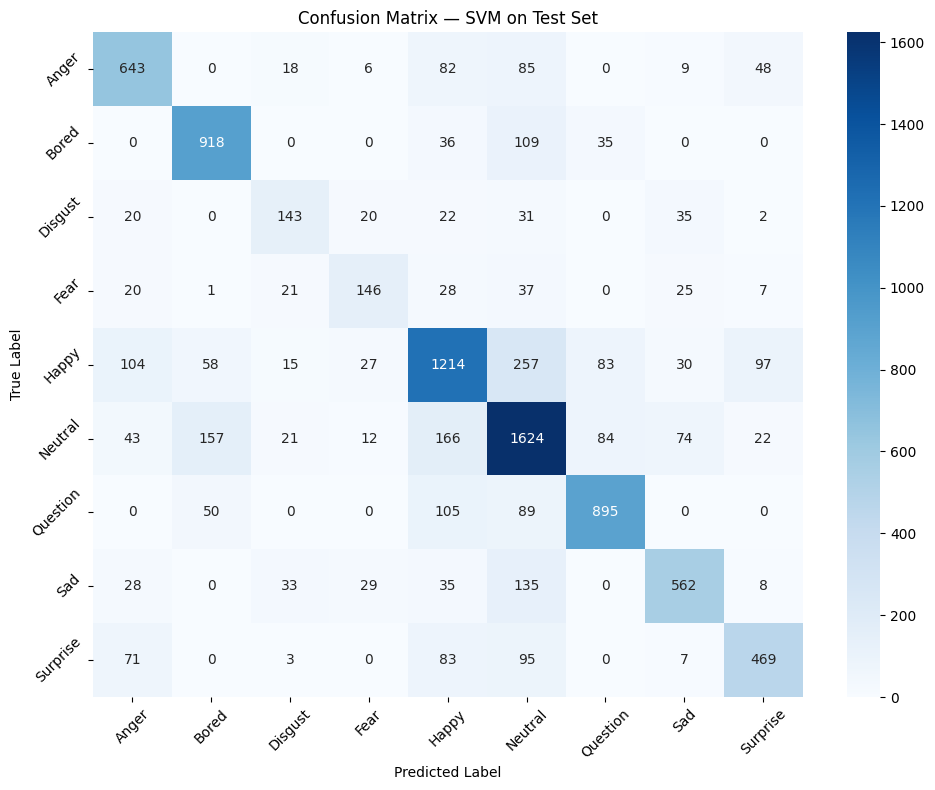

In [9]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Best estimator
best_svm = grid_search.best_estimator_

# Predict on test set
Y_test_pred = best_svm.predict(X_test_scaled)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
print('Test Set Accuracy:', test_accuracy)
print('\nTest Set Classification Report:\n', classification_report(Y_test, Y_test_pred))

cm = confusion_matrix(Y_test, Y_test_pred)
labels = best_svm.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix — SVM on Test Set')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Conclusion

In this notebook, we successfully built and evaluated an SVM classifier for speech emotion recognition:
- Loaded and explored the data, checking for missing values and class imbalances.
- Preprocessed by selecting PC features and scaling with `StandardScaler` (critical for SVM).
- Trained a baseline SVM model to establish an initial benchmark.
- Tuned hyperparameters (`C`, `kernel`, `gamma`) via `GridSearchCV` with 5‑fold CV.
- Evaluated the tuned model on the test set, reporting accuracy, per‑class metrics, and a confusion matrix.